## Estimating regression fits

seaborn regression plot  
- EDA 중 데이터 집합의 패턴 강조에 도움이 될 만한 시각적 가이드 제공을 위함  
- 통계를 위한 툴이 아님(∴ 측정값이 필요하면 통계 모델 따로 쓸 것)  

## Functions for drawing linear regression models
`regplot()` 또는 `lmplot()`를 사용해 회귀선 구현  
1. scatterplot x, y
2. fit reg model y ~ x
3. draw reg line & 95% confidence interval

In [1]:
import seaborn as sns
import numpy as np

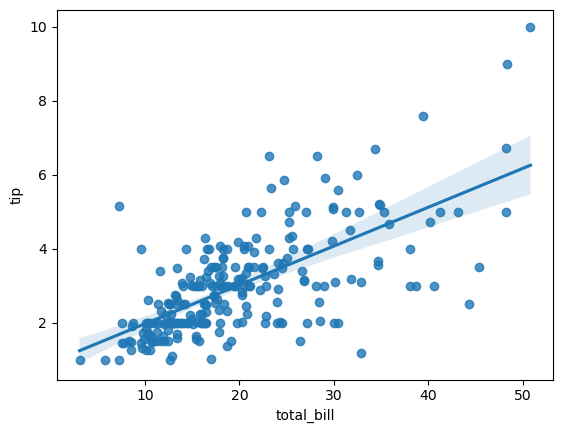

In [2]:
tips = sns.load_dataset("tips")
sns.regplot(x="total_bill", y="tip", data=tips);

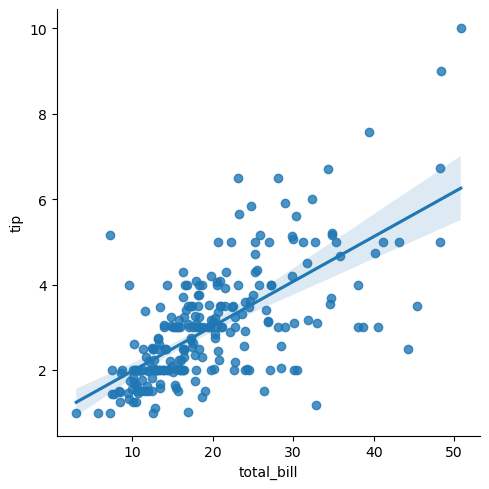

In [3]:
sns.lmplot(x="total_bill", y="tip", data=tips);

차이
`regplot()`  
- 축 수준 함수
- 간단한 numpy 배열, pandas.Series 객체 또는 데이터로 전달된 pandas.DataFrame 객체의 변수에 대한 참조를 포함하여 다양한 형식의 x 및 y 변수 받음

`lmplot()`  
- 그림 수준 함수
- 데이터를 필수 매개변수로 사용하며 x 및 y 변수는 문자열로 지정해야 함
- hue 매개변수 있음

하지만 핵심 기능은 비슷함(이 튜토리얼에서는 lmplot() 중심)
변수 중 하나가 불연속 값을 취하는 경우 선형 회귀를 맞출 수 있지만, 이러한 종류의 데이터 집합에서 생성되는 단순 산점도는 최적이 아닌 경우가 많습니다:


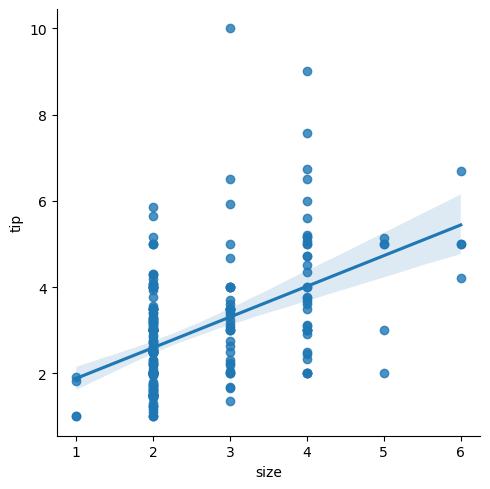

In [4]:
sns.lmplot(x="size", y="tip", data=tips);

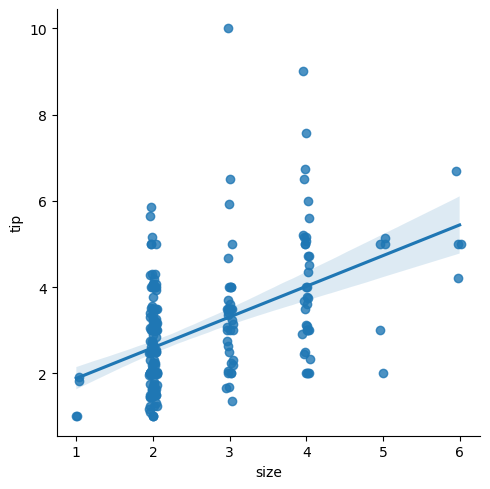

In [5]:
# 1. 불연속형 값에 임의의 노이즈('지터')를 추가하여 해당 값의 분포를 더 명확하게 만드는 방법
#지터는 분산형 차트 데이터에만 적용되며 회귀선 적합도 자체에는 영향을 미치지 않습니다:

sns.lmplot(x="size", y="tip", data=tips, x_jitter=.05);


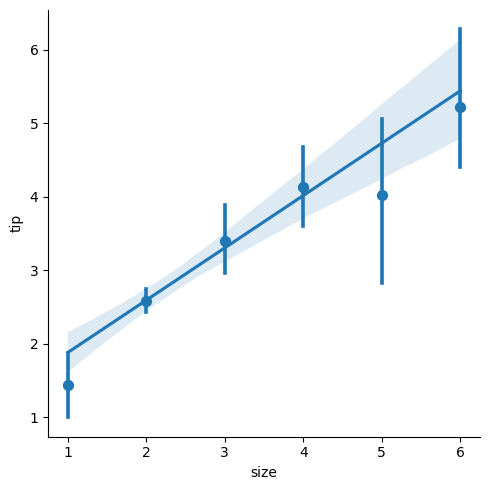

In [6]:
# 2. 각 불연속형 구간차원의 관측값을 축소하여 신뢰 구간과 함께 중심 경향의 추정치 플롯
sns.lmplot(x="size", y="tip", data=tips, x_estimator=np.mean);

## Fitting different kinds of models

선형회귀는 일부 데이터 세트에는 적합하지 않음(대표적인 예 :  Anscombe’s quartet )

In [7]:
anscombe = sns.load_dataset("anscombe")

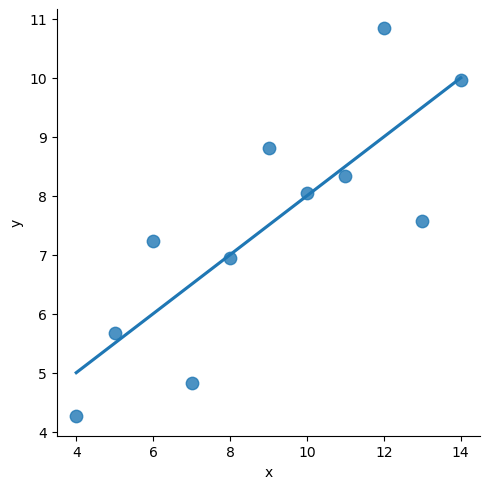

In [8]:
# 좋은 예
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'I'"),
           ci=None, scatter_kws={"s": 80});

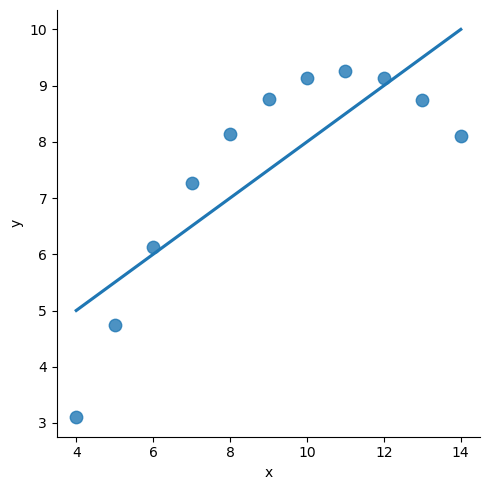

In [9]:
# 안좋은 예
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'II'"),
           ci=None, scatter_kws={"s": 80});

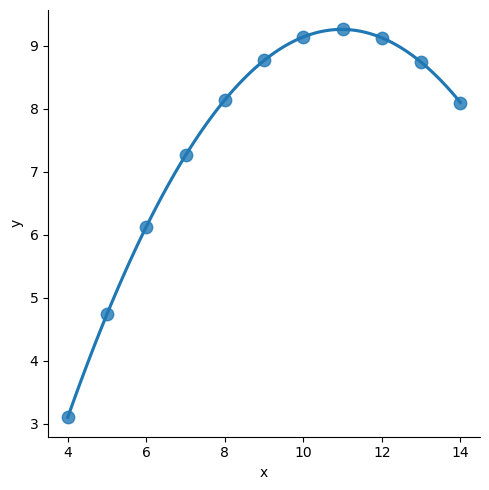

In [10]:
# lmplot(), regplot()에서 간단한 비선형 추세 탐색 가능(order)
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'II'"),
           order=2, ci=None, scatter_kws={"s": 80});

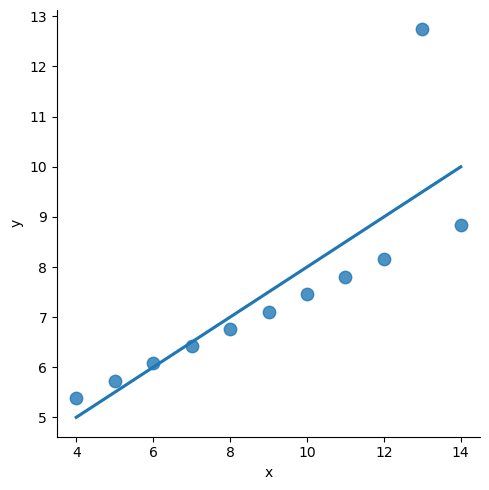

In [11]:
# 다른 유형의 안좋은 예(이상치)
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'III'"),
           ci=None, scatter_kws={"s": 80});

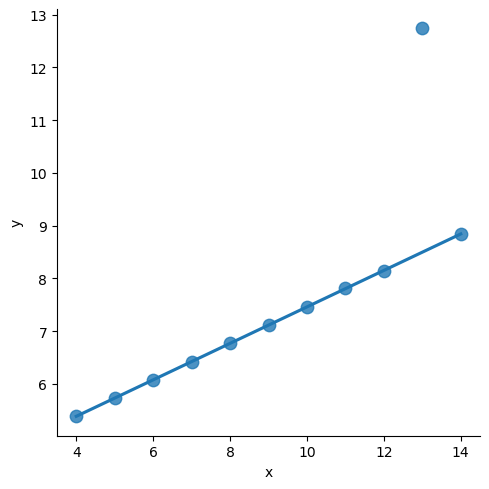

In [12]:
# 이상치를 고려한 방법(손실함수를 사용해 상대적으로 큰 잔차의 가중치를 감소시키는 것)
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'III'"),
           robust=True, ci=None, scatter_kws={"s": 80});

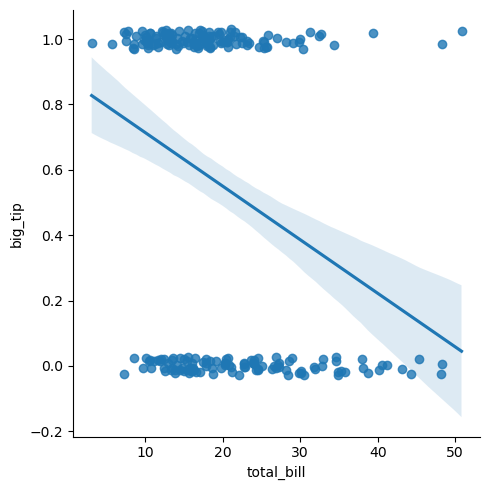

In [13]:
# y변수가 이진수일 경우 회귀선을 그릴 순 있지만 신뢰도가 낮음
tips["big_tip"] = (tips.tip / tips.total_bill) > .15
sns.lmplot(x="total_bill", y="big_tip", data=tips,
           y_jitter=.03);

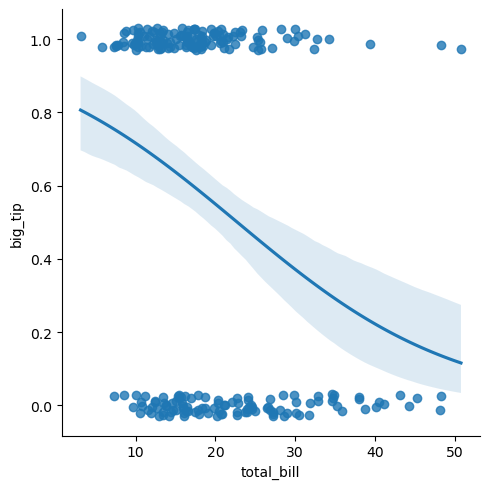

In [14]:
# 위 문제를 해결하기 위해 회귀선이 주어진 x 값에 대해 y = 1의 추정 확률을 표시하도록 로지스틱 회귀 사용
# 로지스틱 회귀는 더 계산적, 집약적이라는 점 유의 (?)
# 회귀선 주변 신뢰구간은 부트스트랩 계산으로 자원을 많이 먹음, 필요없을 경우 사용 X
sns.lmplot(x="total_bill", y="big_tip", data=tips,
           logistic=True, y_jitter=.03);

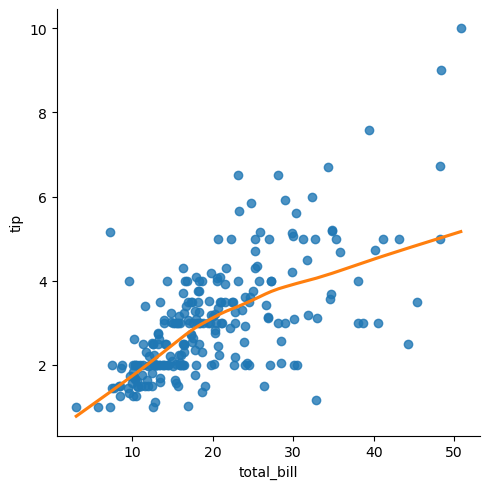

In [15]:
# lowess smoother를 사용하여 비모수 회귀 사용하는 방법
# 신뢰 구간이 전혀 계산되지 않음
sns.lmplot(x="total_bill", y="tip", data=tips,
           lowess=True, line_kws={"color": "C1"});

residplot() 함수는 단순 회귀 모델이 데이터 세트에 적합한지 확인하는 데 유용한 도구가 될 수 있습니다.   
간단한 선형 회귀를 적합하고 제거한 다음 각 관찰에 대한 잔차 값을 플로팅합니다.   
이상적으로는 이러한 값이 y = 0 주변에 무작위로 흩어져 있어야 합니다.  

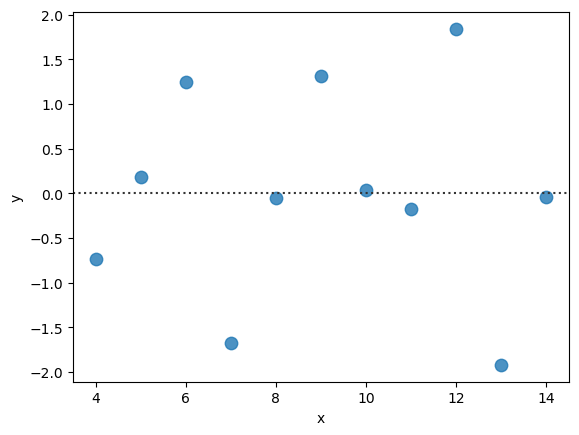

In [16]:
sns.residplot(x="x", y="y", data=anscombe.query("dataset == 'I'"),
              scatter_kws={"s": 80});

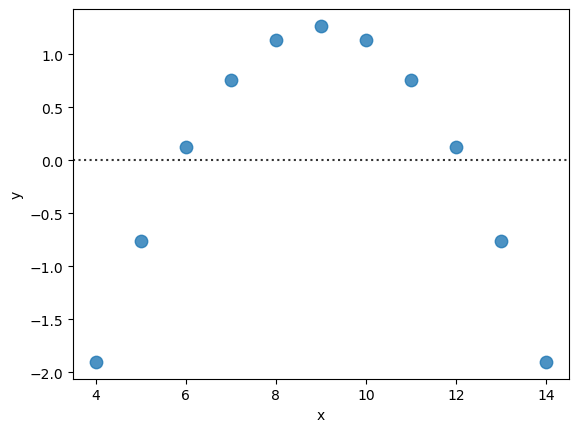

In [17]:
# 잔차에 구조가 있는 경우 단순 선형 회귀가 적절하지 않음
sns.residplot(x="x", y="y", data=anscombe.query("dataset == 'II'"),
              scatter_kws={"s": 80});

## Conditioning on other variables
위의 플롯은 한 쌍의 변수 간의 관계를 탐색하는 여러 가지 방법을 보여줍니다.   
그러나 종종 더 흥미로운 질문은 "이 두 변수 간의 관계가 세 번째 변수의 함수에 따라 어떻게 변하는가?"입니다.   
바로 이 지점에서 regplot()과 lmplot()의 주요 차이점이 나타납니다.   
regplot()은 항상 단일 관계를 표시하는 반면, lmplot()은 regplot()과 패싯그리드를 결합하여 색조 매핑 또는 패싯팅을 사용하여 여러 개의 맞춤을 표시합니다.  

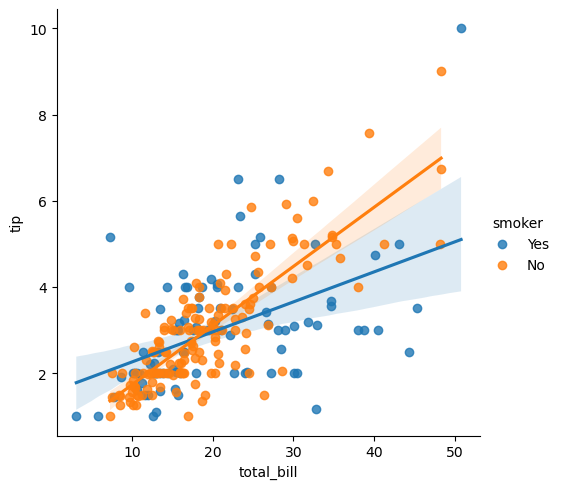

In [18]:
# 두 레벨을 같은 축에 플롯하고 색상을 사용하여 구분
sns.lmplot(x="total_bill", y="tip", hue="smoker", data=tips);

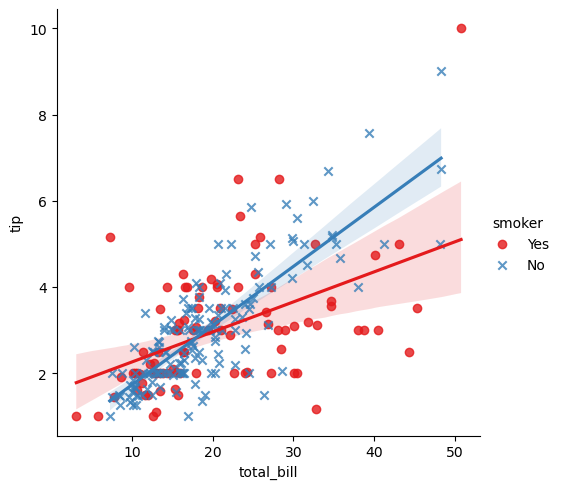

In [19]:
# relplot()과 달리 분산형 차트의 스타일 속성에 고유 변수를 매핑할 수는 없지만 색조 변수를 마커 모양과 중복 코딩 가능:
sns.lmplot(x="total_bill", y="tip", hue="smoker", data=tips,
           markers=["o", "x"], palette="Set1");

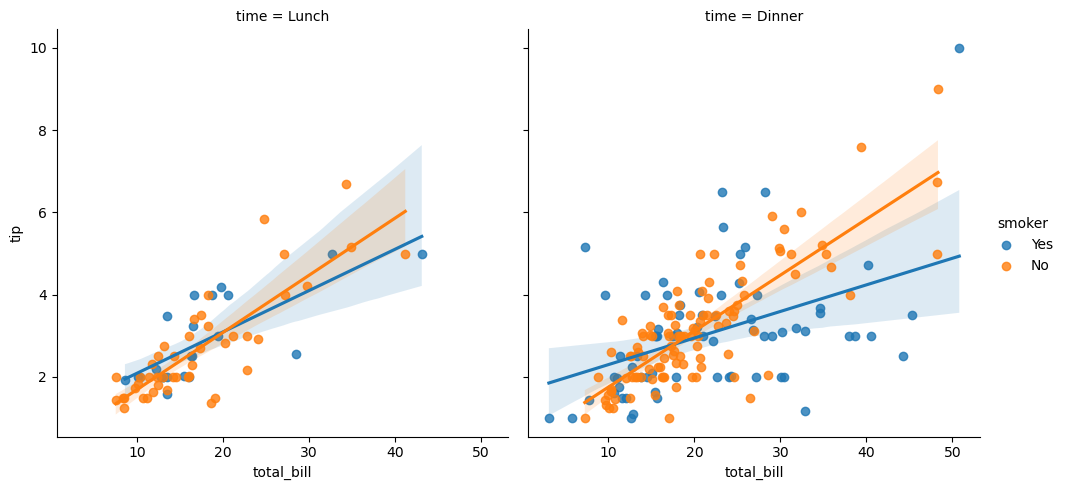

In [20]:
# 다른 변수를 추가하려면 그리드의 행이나 열에 변수의 각 수준이 표시되는 여러 '패싯'을 그릴 수 있습니다:
# 열에 time 할당
sns.lmplot(x="total_bill", y="tip", hue="smoker", col="time", data=tips);

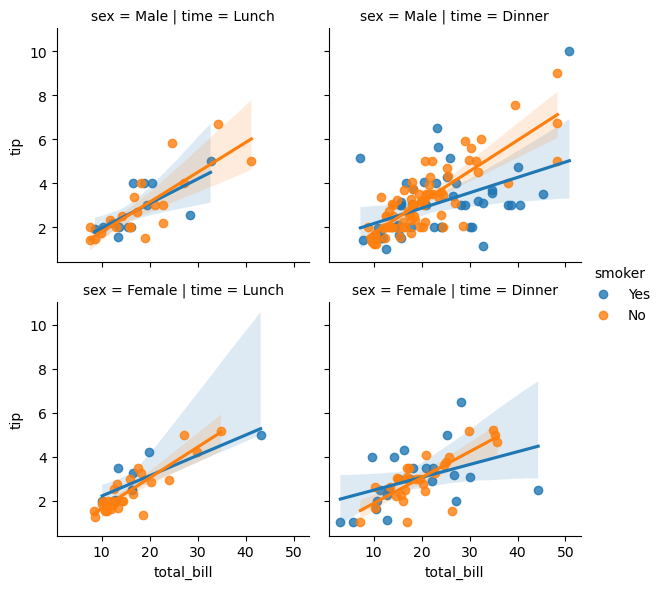

In [21]:
# 열에 time, 행에 sex 할당
sns.lmplot(x="total_bill", y="tip", hue="smoker",
           col="time", row="sex", data=tips, height=3);